# 771763 Understanding Artificial Intelligence ACW 2 <br>
## Convolutional Neural Network Learning <br>
This notebook looks to create and train a convolutional neural network to predict the correct classifcation of a simple image recognition task. The intial part will identify if the image is of a cat or a dog. The latter part of this project will attempt to identify if the subject of the image is a bicycle or car. 

In [1]:
#Import libs 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os 

import tensorflow as tf

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Func to disp some images 
def showImages(arg):
    fig, axes = plt.subplots(1, 5, figsize = (25, 25))
    axes = axes.flatten()
    for image, ax in zip(arg, axes):
        ax.imshow(image)
    plt.tight_layout()
    plt.show()

In [3]:
# Read in data 
trainDir = './data/train' 
validateDir = './data/validation' 
testDir = './data/test' 
 
trainDogsDir = os.path.join(trainDir, 'dogs') 
trainCatsDir = os.path.join(trainDir, 'cats') 
validateDogsDir = os.path.join(validateDir, 'dogs') 
validateCatsDir = os.path.join(validateDir, 'cats') 
testCatsAndDogsDir = os.path.join(testDir, 'cats_and_dogs') 

In [4]:
# Find len of data 
numDogsTrain = len(os.listdir(trainDogsDir)) 
numCatsTrain = len(os.listdir(trainCatsDir)) 
numDogsValidate = len(os.listdir(validateDogsDir)) 
numCatsValidate = len(os.listdir(validateCatsDir)) 
 
trainTotal = numDogsTrain + numCatsTrain 
validateTotal = numDogsValidate + numCatsValidate 
testTotal = len(os.listdir(testCatsAndDogsDir))

In [5]:
# Define batch size (No of files used for training )
batchSize = 32
# Define img size
imageSize = 150

In [6]:
# Make images same scale 
imageGen = ImageDataGenerator(rescale = 1./255)

In [7]:
#Set up the train image generator
trainImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = trainDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')
#Set up validation image gen
validImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = validateDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')
#Set up test image gen 
testImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = testDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.
Found 200 images belonging to 1 classes.


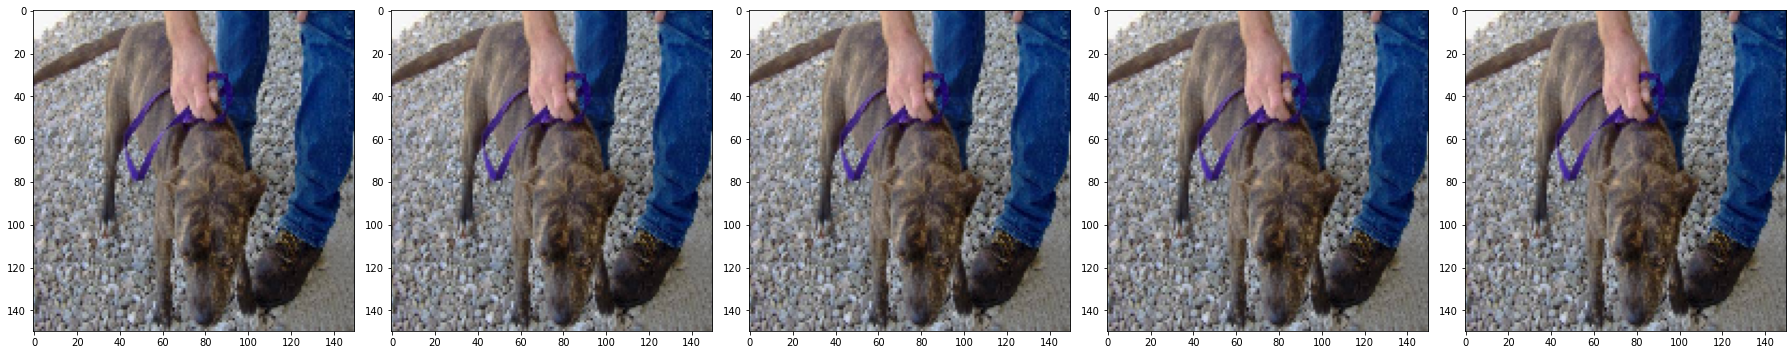

In [8]:
# See some images 
showImages([trainImgGen[1][0][0] for i in range (30)])

In [9]:
# Build Model by defining params
model = Sequential() 
 
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
 
model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
 
model.add(Conv2D(128, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
 
model.add(Conv2D(128, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
 
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
 
model.add(Dropout(0.5)) 
 
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compile Model 
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

In [11]:
# Summarize model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [12]:
# Train the model 
fitResult = model.fit_generator(trainImgGen, 
     steps_per_epoch=int(np.ceil(trainTotal / float(batchSize))), 
     epochs=5,  
     validation_data=validImgGen, 
     validation_steps=int(np.ceil(validateTotal / float(batchSize))) 
     ) 

Epoch 1/5


C:\Program Files\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


625/625 [==============================] - 252s 402ms/step - loss: 0.6300 - accuracy: 0.6413 - val_loss: 0.5015 - val_accuracy: 0.7481
Epoch 2/5
625/625 [==============================] - 249s 399ms/step - loss: 0.4887 - accuracy: 0.7669 - val_loss: 0.4594 - val_accuracy: 0.7817
Epoch 3/5
625/625 [==============================] - 256s 409ms/step - loss: 0.4087 - accuracy: 0.8163 - val_loss: 0.3755 - val_accuracy: 0.8327
Epoch 4/5
625/625 [==============================] - 245s 391ms/step - loss: 0.3550 - accuracy: 0.8437 - val_loss: 0.3546 - val_accuracy: 0.8433
Epoch 5/5
625/625 [==============================] - 243s 389ms/step - loss: 0.3178 - accuracy: 0.8680 - val_loss: 0.3467 - val_accuracy: 0.8531


In [13]:
# Check metrics over epochs 
print(fitResult.history['accuracy'])

[0.6412500143051147, 0.7669000029563904, 0.8162999749183655, 0.8436999917030334, 0.8679999709129333]


In [14]:
#Save Model 
model.save_weights('model3.h5')

In [15]:
# Check how well model performed
correct = 0
incorrect = 0 

testImgGen.reset()

prediction = model.predict_generator(testImgGen, steps = testTotal/batchSize, verbose = 1)

predictedClassIndices = np.round(prediction)

labels = (trainImgGen.class_indices)
labels = dict((n, m) for m, n in labels.items())

predictions = [labels[m[0]] for m in predictedClassIndices]

filenames = testImgGen.filenames
results = pd.DataFrame({"Filename": filenames, "Predictions": predictions})

for index, value in results.iterrows():
    filename = value[0].replace('cats_and_dogs\\', '')
    predictionValue = value[1]
    
    if (filename.split('.')[0] + 's' == predictionValue):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
        
print('Acc on test data: ' + str(round((correct/testTotal)*100, 1)) + '%')

C:\Program Files\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


6/6 [==============================] - 1s 78ms/step
Acc on test data: 55.0%


# The next section will cover task 2 of the ACW

In [91]:
# Read in data 
trainvehDir = './createdDataset/train' 
validatevehDir = './createdDataset/validation' 
testvehDir = './createdDataset/test' 
 
trainBikeDir = os.path.join(trainvehDir, 'bicycles') 
trainCarsDir = os.path.join(trainvehDir, 'cars') 
validateBikeDir = os.path.join(validatevehDir, 'bicycles') 
validateCarsDir = os.path.join(validatevehDir, 'cars') 
testBikeAndCarDir = os.path.join(testvehDir, 'bicycles_and_cars') 

In [92]:
# Find len of data 
numBikesTrain = len(os.listdir(trainBikeDir)) 
numCarsTrain = len(os.listdir(trainCarsDir)) 
numBikesValidate = len(os.listdir(validateBikeDir)) 
numCarsValidate = len(os.listdir(validateCarsDir)) 
 
trainTotal = numBikesTrain + numCarsTrain 
validateTotal = numBikesValidate + numCarsValidate 
testTotal = len(os.listdir(testBikeAndCarDir))

In [93]:
# Define batch size (No of files used for training )
batchSize = 32
# Define img size
imageSize = 150

In [94]:
# Make images same scale 
imageGen = ImageDataGenerator(rescale = 1./255)

In [95]:
#Set up the train image generator
trainImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = trainvehDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')
#Set up validation image gen
validImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = validatevehDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')
#Set up test image gen 
testImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = testvehDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')

Found 160 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
Found 40 images belonging to 1 classes.


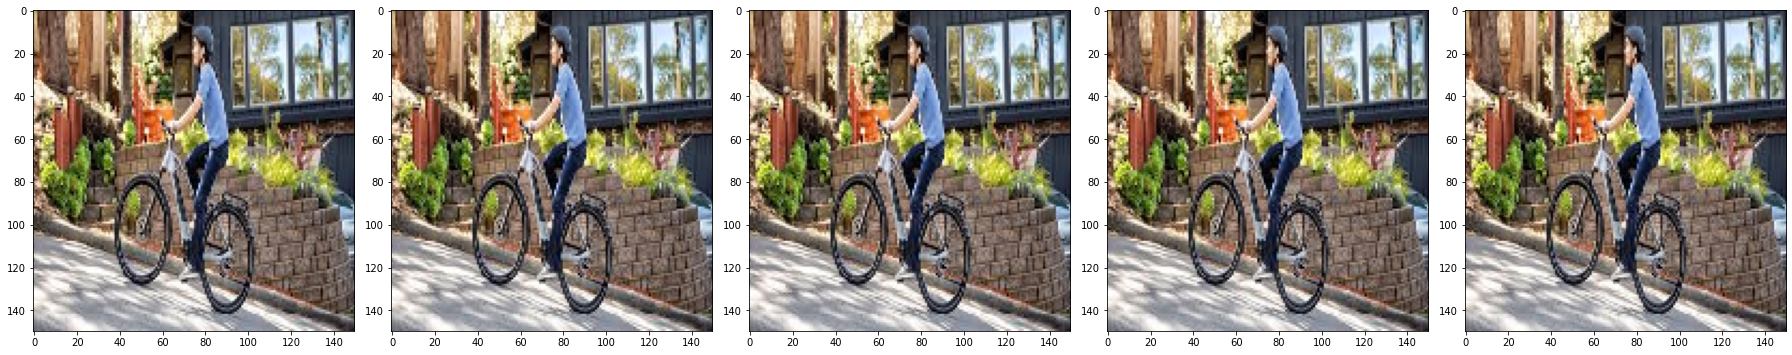

In [96]:
# See some images 
showImages([trainImgGen[1][0][0] for i in range (30)])

In [97]:
# Build Model by defining params
model2 = Sequential() 
 
model2.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3))) 
model2.add(Activation('relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
 
model2.add(Conv2D(64, (3, 3))) 
model2.add(Activation('relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
 
model2.add(Conv2D(128, (3, 3))) 
model2.add(Activation('relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
 
model2.add(Conv2D(128, (3, 3))) 
model2.add(Activation('relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
 
model2.add(Flatten()) 
model2.add(Dense(256, activation='relu')) 
 
model2.add(Dropout(0.5)) 
 
model2.add(Dense(1, activation='sigmoid'))

# Compile Model 
model2.compile(loss = 'binary_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

In [98]:
# Train the model 
fitResult2 = model2.fit_generator(trainImgGen, 
     steps_per_epoch=int(np.ceil(trainTotal / float(batchSize))), 
     epochs=25,  
     validation_data=validImgGen, 
     validation_steps=int(np.ceil(validateTotal / float(batchSize))) 
     ) 

Epoch 1/25
5/5 [==============================] - 3s 480ms/step - loss: 1.7249 - accuracy: 0.4625 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 2s 437ms/step - loss: 0.6824 - accuracy: 0.4750 - val_loss: 1.6941 - val_accuracy: 0.5000
Epoch 3/25
5/5 [==============================] - 2s 432ms/step - loss: 0.8511 - accuracy: 0.5250 - val_loss: 0.6666 - val_accuracy: 0.8857
Epoch 4/25
5/5 [==============================] - 2s 435ms/step - loss: 0.7322 - accuracy: 0.7125 - val_loss: 0.6491 - val_accuracy: 0.5714
Epoch 5/25
5/5 [==============================] - 2s 434ms/step - loss: 0.6624 - accuracy: 0.5938 - val_loss: 0.5939 - val_accuracy: 0.6714
Epoch 6/25
5/5 [==============================] - 2s 439ms/step - loss: 0.4991 - accuracy: 0.7875 - val_loss: 0.4123 - val_accuracy: 0.8000
Epoch 7/25
5/5 [==============================] - 2s 437ms/step - loss: 0.3123 - accuracy: 0.8875 - val_loss: 0.7776 - val_accuracy: 0.6714
Epoch 8/25
5/5 [====

In [99]:
# Check metrics over epochs 
print(fitResult2.history['accuracy'])

[0.4625000059604645, 0.4749999940395355, 0.5249999761581421, 0.7124999761581421, 0.59375, 0.7875000238418579, 0.887499988079071, 0.731249988079071, 0.8812500238418579, 0.925000011920929, 0.925000011920929, 0.918749988079071, 0.925000011920929, 0.9375, 0.925000011920929, 0.96875, 0.9125000238418579, 0.9750000238418579, 0.987500011920929, 0.9624999761581421, 0.987500011920929, 0.9937499761581421, 0.8999999761581421, 0.9937499761581421, 1.0]


In [100]:
#Save Model 
model2.save_weights('model2.h5')

In [102]:
# Check how well model performed
correct = 0
incorrect = 0 

testImgGen.reset()

prediction = model2.predict_generator(testImgGen, steps = testTotal/batchSize, verbose = 1)

predictedClassIndices = np.round(prediction)

labels = (trainImgGen.class_indices)
labels = dict((n, m) for m, n in labels.items())

predictions = [labels[m[0]] for m in predictedClassIndices]

filenames = testImgGen.filenames
results = pd.DataFrame({"Filename": filenames, "Predictions": predictions})

for index, value in results.iterrows():
    filename = value[0].replace('bicycles_and_cars\\', '')
    predictionValue = value[1]
    
    if (filename.split('.')[0] + 's' == predictionValue):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
        
print('Acc on test data: ' + str(round((correct/testTotal)*100, 1)) + '%')

1/1 [==============================] - 0s 92ms/step
Acc on test data: 45.0%


Now to run the model for the close in images of the vehicles on white backgrounds

In [155]:
# Read in data 
trainDir = './createdDataset/train_close' 
validateDir = './createdDataset/validation_close' 
testDir = './createdDataset/test_close' 
 
trainBikeDir = os.path.join(trainDir, 'bicycles') 
trainCarsDir = os.path.join(trainDir, 'cars') 
validateBikeDir = os.path.join(validateDir, 'bicycles') 
validateCarsDir = os.path.join(validateDir, 'cars') 
testBikeAndCarDir = os.path.join(testDir, 'bicycles_and_cars') 

In [162]:
# Define batch size (No of files used for training )
batchSize = 69
# Define img size
imageSize = 150

In [163]:
#Set up the train image generator
trainImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = trainDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')
#Set up validation image gen
validImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = validateDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')
#Set up test image gen 
testImgGen = imageGen.flow_from_directory(batch_size = batchSize, directory = testDir, shuffle = True, target_size = (imageSize, imageSize), class_mode = 'binary')

Found 69 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 20 images belonging to 1 classes.


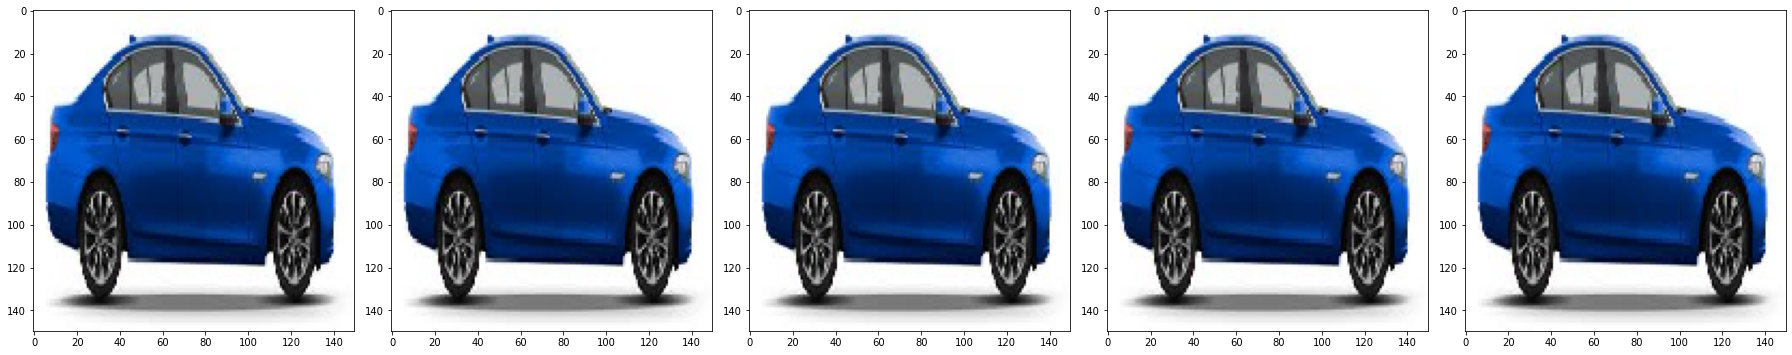

In [167]:
# See some images 
showImages([trainImgGen[0][0][0] for i in range (30)])

In [165]:
# Build Model by defining params
model3 = Sequential() 
 
model3.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3))) 
model3.add(Activation('relu')) 
model3.add(MaxPooling2D(pool_size=(2, 2))) 
 
model3.add(Conv2D(64, (3, 3))) 
model3.add(Activation('relu')) 
model3.add(MaxPooling2D(pool_size=(2, 2))) 
 
model3.add(Conv2D(128, (3, 3))) 
model3.add(Activation('relu')) 
model3.add(MaxPooling2D(pool_size=(2, 2))) 
 
model3.add(Conv2D(128, (3, 3))) 
model3.add(Activation('relu')) 
model3.add(MaxPooling2D(pool_size=(2, 2))) 
 
model3.add(Flatten()) 
model3.add(Dense(256, activation='relu')) 
 
model3.add(Dropout(0.5)) 
 
model3.add(Dense(1, activation='sigmoid'))

# Compile Model 
model3.compile(loss = 'binary_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

In [179]:
# Train the model 
fitResult3 = model3.fit_generator(trainImgGen, 
     steps_per_epoch=int(np.ceil(69 / float(69))), 
     epochs=33,  
     validation_data=validImgGen, 
     validation_steps=int(np.ceil(20 / float(20))) 
     ) 

Epoch 1/33
1/1 [==============================] - 1s 933ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch 2/33
1/1 [==============================] - 1s 922ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 3/33
1/1 [==============================] - 1s 918ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 4/33
1/1 [==============================] - 1s 928ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 5/33
1/1 [==============================] - 1s 935ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 6/33
1/1 [==============================] - 1s 991ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 7/33
1/1 [==============================] - 1s 952ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 8/33
1/1 [====

In [180]:
# Check metrics over epochs 
print(fitResult3.history['accuracy'])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [181]:
#Save Model 
model3.save_weights('model3.h5')

In [182]:
# Check how well model performed
correct = 0
incorrect = 0 

testImgGen.reset()

prediction = model3.predict_generator(testImgGen, steps = 20/20, verbose = 1)

predictedClassIndices = np.round(prediction)

labels = (trainImgGen.class_indices)
labels = dict((n, m) for m, n in labels.items())

predictions = [labels[m[0]] for m in predictedClassIndices]

filenames = testImgGen.filenames
results = pd.DataFrame({"Filename": filenames, "Predictions": predictions})

for index, value in results.iterrows():
    filename = value[0].replace('bicycles_and_cars\\', '')
    predictionValue = value[1]
    
    if (filename.split('.')[0] + 's' == predictionValue):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
        
print('Acc on test data: ' + str(round((correct/testTotal)*100, 1)) + '%')


1/1 [==============================] - 0s 89ms/step
Acc on test data: 32.5%
